<a href="https://colab.research.google.com/github/kogata1/kogata1/blob/main/McKibben_actuator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**McKibben Actuator**

From Chou and Hannaford 1996 equation 8b for the force $F$ 

$$F=\frac{\pi D_{0}^{2} P'}{4} (3 \cos^2\theta-1)$$

where $P'$ is pressure, $D_0=\frac{b}{n \pi}$ is the diameter when $\theta=90$. The length of the helical fibers is $b$ and $n$ is the number of windings on the cylinder. The angle $\theta$ is the angle of the helical winding with the long axis.

Ching-Ping Chou and B. Hannaford, "Measurement and modeling of McKibben pneumatic artificial muscles," in IEEE Transactions on Robotics and Automation, vol. 12, no. 1, pp. 90-102, Feb. 1996, doi: 10.1109/70.481753.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d0=0.001 #diameter (m) when theta is 90 degrees. This corresponds to the shortest possible cylinder.
pprime=10000 #pressure in actuator (Pa)
ps=np.linspace(0, 10000, 3) #generate an array with 3 pressures (Pa)
theta=np.arange(0,91,1) # generate an array of angles in degrees
dtor=np.pi/180 #conversion factor from degrees to radians
f1=(np.pi*d0**2*ps[0]*(3*(np.cos(dtor*theta))**2-1)/4)
f2=(np.pi*d0**2*ps[1]*(3*(np.cos(dtor*theta))**2-1)/4)
f3=(np.pi*d0**2*ps[2]*(3*(np.cos(dtor*theta))**2-1)/4)

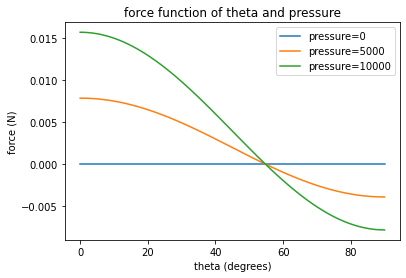

In [3]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(theta, f1, label='pressure=0')  # Plot some data on the axes.
ax.plot(theta, f2, label='pressure=5000')  # Plot more data on the axes...
ax.plot(theta,f3, label='pressure=10000')  # ... and some more.
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('force (N)')  # Add a y-label to the axes.
ax.set_title("force function of theta and pressure")  # Add a title to the axes.
ax.legend()  # Add a legend.

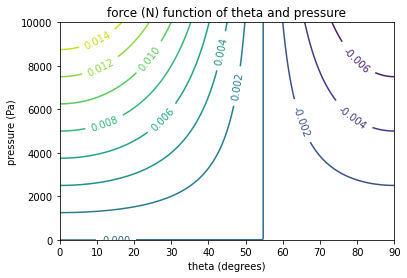

In [4]:
# make data
th, pp = np.meshgrid(np.linspace(0, 90, 90), np.linspace(0, 10000, 100))
ff=(np.pi*d0**2*pp*(3*(np.cos(dtor*th))**2-1)/4)
levels = np.linspace(np.min(ff), np.max(ff), 13)

# plot
fig, ax = plt.subplots()

CS=ax.contour(th, pp, ff, levels=levels)
plt.xlabel('theta (degrees)')
plt.ylabel('pressure (Pa)')
ax.set_title("force (N) function of theta and pressure")
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.show()

From Chou and Hannaford 1996 equations 5,6,7

$$L=b \cos{\theta}$$
$$D=\frac{b \sin{\theta}}{n \pi}$$
$$V=\frac{1}{4}\pi D^2 L$$  

consider a cylindrical tubefoot of length $l_i=0.01 m$ and an initial braid angle of $54.7^{\circ}$, i.e. when the longitudinal force is zero.

In [5]:
li=0.01 #cylinder length (m)
thetai=54.7 #initial theta (degree)
b=li/np.cos(dtor*thetai) # rearrangement of eqn 5 above
b # wound fiber length (m)

0.01730530078350809

assume that the cylinder diameter at $\theta=90^\circ$ is 0.001 m as is assumed for the value of $D_0$ above

In [6]:
ni=li*np.tan(dtor*thetai)/(d0*np.pi) #rearrangement fo eqn 6 above
ni #the number of turns around the cylinder

4.495651739230464

In [7]:
lth=b*np.cos(dtor*theta) #length as a function of theta

No handles with labels found to put in legend.


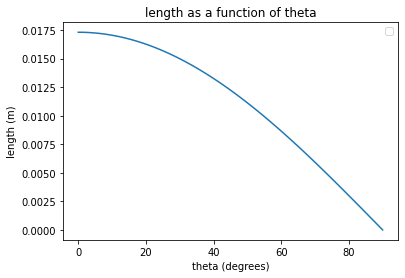

In [8]:
fig, ax = plt.subplots()  # Create a figure and axes.
ax.plot(theta, lth)  # Plot lth as a function of theta
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('length (m)')  # Add a y-label to the axes.
ax.set_title("length as a function of theta")  # Add a title to the axes.
ax.legend()  # Add a legend.

No handles with labels found to put in legend.


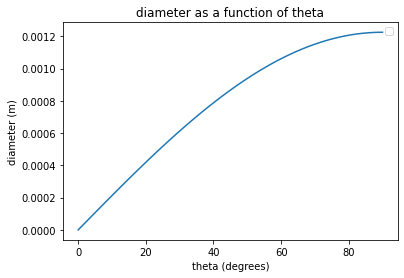

In [9]:
dth=b*np.sin(dtor*theta)/(ni*np.pi) #diameter as a function of theta
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(theta, dth)  # Plot some data on the axes.
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('diameter (m)')  # Add a y-label to the axes.
ax.set_title("diameter as a function of theta")  # Add a title to the axes.
ax.legend()  # Add a legend.

No handles with labels found to put in legend.


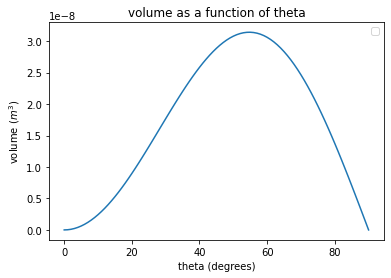

In [10]:
vth=np.pi*dth**2*lth #volume as a function of theta
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(theta, vth)  # Plot volume as a function of theta
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('volume ($m^3$)')  # Add a y-label to the axes.
ax.set_title("volume as a function of theta")  # Add a title to the axes.
ax.legend()  # Add a legend.

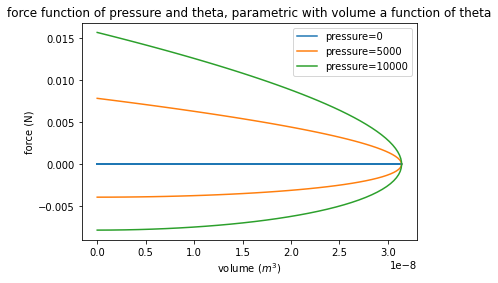

In [11]:
fig, ax = plt.subplots()  # Create a figure and axes.
ax.plot(vth, f1, label='pressure=0')  # Parametric plot of force as a function of theta and volume as a function of theta. Force depends also on pressure=0 Pa.
ax.plot(vth, f2, label='pressure=5000')  # Parametric plot of force as a function of theta and volume as a function of theta. Force depends also on pressure=5000 Pa.
ax.plot(vth,f3, label='pressure=10000')  # Parametric plot of force as a function of theta and volume as a function of theta. Force depends also on pressure=10000 Pa.
ax.set_xlabel('volume ($m^3$)')  # Add an x-label to the axes.
ax.set_ylabel('force (N)')  # Add a y-label to the axes.
ax.set_title("force function of pressure and theta, parametric with volume a function of theta")  # force and volume parametric functions of theta.
ax.legend()  # Add a legend.

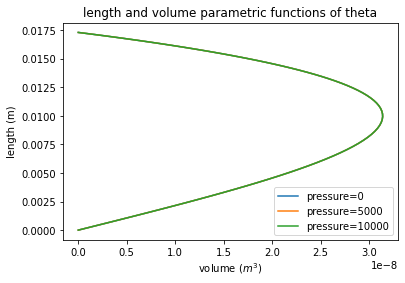

In [12]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(vth, lth, label='pressure=0')  # length and volume both parametric functions of theta but independent of pressure.
ax.plot(vth, lth, label='pressure=5000')  # length and volume both parametric functions of theta but independent of pressure.
ax.plot(vth, lth, label='pressure=10000')  # length and volume both parametric functions of theta but independent of pressure.
ax.set_xlabel('volume ($m^3$)')  # Add an x-label to the axes.
ax.set_ylabel('length (m)')  # Add a y-label to the axes.
ax.set_title("length and volume parametric functions of theta")  # Add a title to the axes.
ax.legend()  # Add a legend.

Above the three levels of pressure lie on top of each other. That is, pressure has no effect on the volume length curve.

**Mechanical Advantage**

Mechanical Advantage, $MA$ is
$$MA=\frac{F_{out}}{F_{in}}$$
Mechanical Advantage can be caclulated from the principle of conservation of energy.
Work in divided by work out equals 1.

$$\frac{W_{in}}{W_{out}}=1$$

$$\frac{F_{in} x_{in}}{F_{out} x_{out}}=1$$

$$\frac{F_{in}}{F_{out}}=\frac{x_{out}}{x_{in}}$$

which is where the general principle comes from that mechanical advantage force ratio,  is the inverse of displacement ratio for machines in which energy is conserved.



**Mechanical Advantage in the Context of a McKibben Actuator**

Using an energy approach, Chou & Hannaford, 1996 show in eqns 1-4

$$-F dL=P^{'} dV$$

where the left hand side is work out and the right hand side is work in.
Thus

$$F_{out}=-P^{'} \frac{dV}{dL}$$

Then using eqn 5,6,7 which gives the constraints of a helically wrapped cylinder they show that 

$$F_{out}=\frac{\pi D_0^2}{4} P^{'} (3 \cos^2 \theta -1)$$

The term $\frac{\pi D_0^2}{4} P^{'}$ is the force out when $\theta=\frac{\pi}{2}$. Thus the force out of the McKibben actuator can be compared to the end force produced by a given pressure in the infinitesimally short cylinder an that ratio is given by $3 \cos^2 \theta -1$. But this is not the mechanical advantage but merely compares a infinitesimally long cyclinder with the actuator.

We aim to calculate the mechanical advantage of the McKibben actuator. We have an expression for $F_{out}$; now we need an expression for $F_{in}$.

Fro eqn (1) in Chou and Hannaford we have $dW_{in}=P^{'}dV$. Similarly, $dF_{in}=P^{'} dA$. From eqn 5 and 6 we have that $$A=L \pi D = \frac{b^2}{n} \cos \theta \sin \theta$$
$$\frac{dA}{d \theta} = \frac{b^2}{n} (\cos^2 \theta - \sin^2 \theta)$$

$$F_{in}=\int P^{'} dA= P^{'} \int \frac{b^2}{n} (\cos^2 \theta - \sin^2 \theta) d \theta=P^{'} \frac{b^2}{n} \frac{1}{2} \sin(2 \theta)$$

The mechanical advantage is thus

$$\frac{F_{out}}{F_{in}}= \frac{\left(3 \cos ^2(\theta )-1\right) }{4 n \sin (2 \theta )}$$



In [13]:
foutperfin1=(3*np.cos(dtor*theta[2:-1])**2-1)/(np.sin(2*dtor*theta[2:-1])*4*ni)
foutperfin2=(3*np.cos(dtor*theta[2:-1])**2-1)/(np.sin(2*dtor*theta[2:-1])*4*1)
foutperfin3=(3*np.cos(dtor*theta[2:-1])**2-1)/(np.sin(2*dtor*theta[2:-1])*4*10)

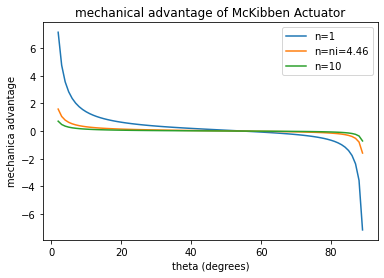

In [14]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(theta[2:-1], foutperfin2, label='n=1')  # Plot some data on the axes.
ax.plot(theta[2:-1], foutperfin1, label='n=ni=4.46') # Plot more data on the axes...
ax.plot(theta[2:-1],foutperfin3, label='n=10')  # ... and some more.
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('mechanica advantage')  # Add a y-label to the axes.
ax.set_title("mechanical advantage of McKibben Actuator")  # Add a title to the axes.
ax.legend()  # Add a legend.

The above graph shows the mechanical advantage of the McKibben Actuator by itself. This mechanical advantage could be moodified by the mechanical advantage of the mechanism that pressurizes the actuator (which would be the ampulla in the analogy with a tube foot where the tube foot itself is the McKibben actuator).

Notice that the mechanical advantage is zero at $\theta=54.7$ degrees since at that angle the volume is maximal and the pressure exerted on the wall of the actuator generates no longitudinal output force. The actuator does not generate any forces that could move it away from that maximum volume point once it reaches it.

**Mechanical Advantage of a Compound Machine**

The advantage of a compound machine is the product of the mechanical advantage of the component machines. We will use this principle to find the mechanical advantage of a compound machine consisting of a piston that pressurizes and fills a McKibben Actuator.

*Variable List*

*   $M_{com}$ MA of compound machine
*   $M_{pis}$ MA of piston to inner cylinder wall
*   $M_{act}$ MA of McKibben cyclinder side wall to end wall
*   $F_{cyl}$ Force exerted on side wall of McKibben actuator
*   $F_{pis}$ Force of piston
*   $F_{act}$ Output force of McKibben actuator
*   $P$ Pressure
*   $A_{cyl}$ Area of of sidewall of cylinder
*   $A_{pis}$ Area of piston
*   $A_{act}$ End area McKibben actuator
*   $D_0$ Diameter of McKibben actuator when $\theta$ is $90^o$
*   $A_{D_0}$ Cross-sectional area associated with $D_0$
*   $b$ Length of a fiber
*   $n$ Number of windings of the fiber
*   $\theta$ angle of the fiber relative to the long axis of the cylinder


The mechanical advantage of the compound machine is given by:

$$M_{com}=M_{pis} M_{act}=\frac{F_{cyl}}{F_{pis}} \frac{F_{act}}{F_{cyl}}=\frac{P A_{cyl}}{P A_{pis}} \frac{P A_{act}}{P A_{cyl}}=\frac{A_{cyl}}{A_{pis}} \frac{A_{act}}{A_{cyl}}=\frac{A_{act}}{A_{pis}}$$

From Eqn 8b in Chou and Hannaford we have:

$$A_{act}=\frac{F_{act}}{P}=\frac{P}{P}\frac{\pi}{4} \,D^2_0 \,(3 \cos^2 \theta -1) =\frac{\pi}{4} \, D^2_0 \, (3 \cos^2 \theta -1) $$

Also from (not numbered) equation Chou and Hannaford:

$$D_0=\frac{b}{n\pi},$$ So:

$$M_{com}=\frac{\frac{\pi}{4}\,(\frac{b}{n\,\pi})^2}{A_{pis}}(3 \cos^2 \theta -1)=\frac{\frac{\pi}{4}\,D^2_0}{A_{pis}}(3 \cos^2 \theta -1)=\frac{A_{D_0}}{A_{pis}} (3 \cos^2 \theta -1)$$

In [15]:
bb=np.array([1,5,10])
nn=np.array([1,5,10])

In [16]:
apis=np.array([0.1,1,10])

In [17]:
def ma(piston_area, bbb,nnn): #variables are piston area, fiber length b, and number of windings, n
    return ((((np.pi/4)*(bbb/(np.pi*nnn))**2)/piston_area)*(3*np.cos(dtor*theta)**2-1)) #mechanical advantage function for compound machine =mcom above

In [18]:
def ma_areas(piston_area,shortest_actuator_area):
  return((shortest_actuator_area/piston_area)*(3*(np.cos(dtor*theta))**2-1))

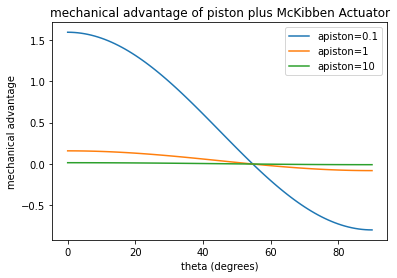

In [19]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(theta, ma(apis[0],bb[0],nn[0]), label='apiston=0.1')  # Plot some data on the axes.
ax.plot(theta, ma(apis[1],bb[0],nn[0]), label='apiston=1') # Plot more data on the axes...
ax.plot(theta,ma(apis[2],bb[0],nn[0]), label='apiston=10')  # ... and some more.
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('mechanical advantage')  # Add a y-label to the axes.
ax.set_title("mechanical advantage of piston plus McKibben Actuator")  # Add a title to the axes.
ax.legend()  # Add a legend.

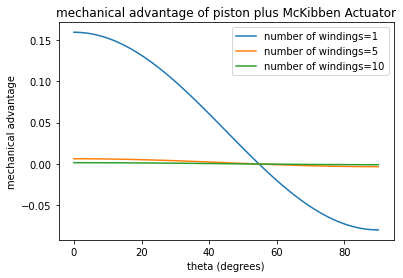

In [20]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(theta, ma(apis[1],bb[0],nn[0]), label='number of windings=1')  # Plot some data on the axes.
ax.plot(theta, ma(apis[1],bb[0],nn[1]), label='number of windings=5') # Plot more data on the axes...
ax.plot(theta,ma(apis[1],bb[0],nn[2]), label='number of windings=10')  # ... and some more.
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('mechanical advantage')  # Add a y-label to the axes.
ax.set_title("mechanical advantage of piston plus McKibben Actuator")  # Add a title to the axes.
ax.legend()  # Add a legend.

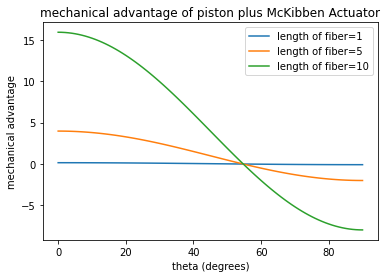

In [21]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(theta, ma(apis[1],bb[0],nn[0]), label='length of fiber=1')  # Plot some data on the axes.
ax.plot(theta, ma(apis[1],bb[1],nn[0]), label='length of fiber=5') # Plot more data on the axes...
ax.plot(theta,ma(apis[1],bb[2],nn[0]), label='length of fiber=10')  # ... and some more.
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('mechanical advantage')  # Add a y-label to the axes.
ax.set_title("mechanical advantage of piston plus McKibben Actuator")  # Add a title to the axes.
ax.legend()  # Add a legend.

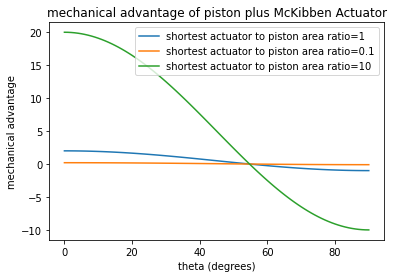

In [22]:
fig, ax = plt.subplots()  # Create a figure and axes.
ax.plot(theta, ma_areas(1,1), label='shortest actuator to piston area ratio=1')  # Plot some data on the axes.
ax.plot(theta, ma_areas(10,1), label='shortest actuator to piston area ratio=0.1') # Plot more data on the axes...
ax.plot(theta,ma_areas(1,10), label='shortest actuator to piston area ratio=10')  # ... and some more.
ax.set_xlabel('theta (degrees)')  # Add an x-label to the axes.
ax.set_ylabel('mechanical advantage')  # Add a y-label to the axes.
ax.set_title("mechanical advantage of piston plus McKibben Actuator")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.savefig('C:\\Users\\oelle\\Ursa Chaos Dropbox\\Olaf Ellers\\McHenry tube foot models\\piston to McKibben MA area ratio.pdf')